In [19]:
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from citipy import citipy
# from api_keys import weather_api_key
# from api_keys import g_key
import time as time
#import wget as wget
%matplotlib notebook
import seaborn as sns
%matplotlib inline

In [20]:
file_to_load = 'COVID_19_time_series_clean_complete_All_Data.csv'
covid_19 = pd.read_csv(file_to_load)
confirmed_19_df = pd.DataFrame(covid_19)
del confirmed_19_df["Unnamed: 0"]
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [21]:
confirmed_19_df.dtypes

Date               object
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
New cases           int64
New deaths          int64
New recovered       int64
dtype: object

In [22]:
# Date from sting to datetime
confirmed_19_df['Date'] = pd.to_datetime(confirmed_19_df['Date'])
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [23]:
confirmed_19_df_by_date_conf = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_conf = confirmed_19_df_by_date_conf.drop(["New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_conf 

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,557,17,30.0,510.0
2020-01-23,655,18,32.0,605.0
2020-01-24,941,26,39.0,876.0
2020-01-25,1433,42,42.0,1349.0
2020-01-26,2118,56,56.0,2006.0
...,...,...,...,...
2021-04-28,149622851,3151122,85650962.0,60820767.0
2021-04-29,150520453,3166125,86348595.0,61005733.0
2021-04-30,151399467,3180403,87025174.0,61193890.0


In [24]:
# confirmed_19_df_by_date_active = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
# confirmed_19_df_by_date_active = confirmed_19_df_by_date_active.drop(["Deaths", "Recovered", "New cases", "New deaths", "New recovered"], axis=1)
# confirmed_19_df_by_date_active 

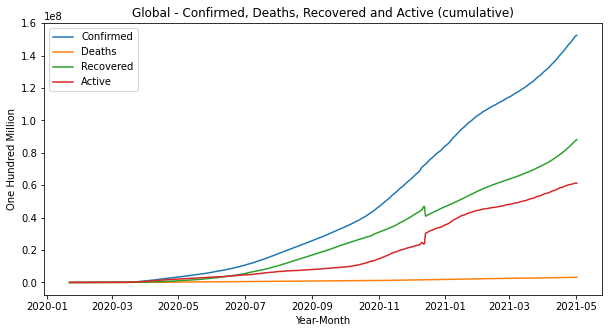

In [29]:
plt.figure(figsize=(10,5))
# y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
# x_axis = confirmed_19_df_by_date_active.index.tolist()
# plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Confirmed, Deaths, Recovered and Active (cumulative)")
plt.plot(confirmed_19_df_by_date_conf)
plt.legend(["Confirmed", "Deaths", "Recovered","Active"], loc = "upper left")
plt.savefig("global_allCovid_cumulative.png")
plt.show()


In [26]:
deaths_19_df_by_date_conf = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
deaths_19_df_by_date_conf = deaths_19_df_by_date_conf.drop(["Confirmed", "Recovered", "Active", "New cases", "New deaths", "New recovered"], axis=1)
deaths_19_df_by_date_conf 

,Deaths
Date,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56
...,...
2021-04-28,3151122
2021-04-29,3166125
2021-04-30,3180403


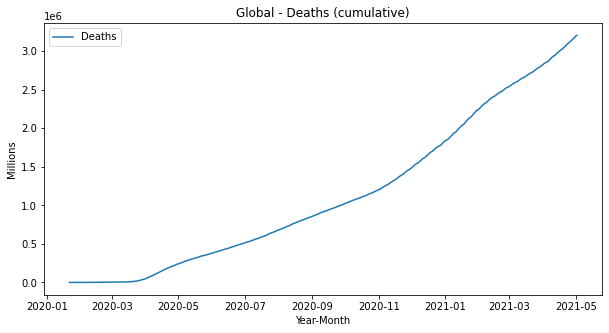

In [31]:
plt.figure(figsize=(10,5))
# y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
# x_axis = confirmed_19_df_by_date_active.index.tolist()
# plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("Millions")
plt.title("Global - Deaths (cumulative)")
plt.plot(deaths_19_df_by_date_conf)
plt.legend([ "Deaths"], loc = "upper left")
plt.savefig("global_deathCovid_cumulative.png")
plt.show()


NameError: name 'confirmed_19_df_by_date_active' is not defined

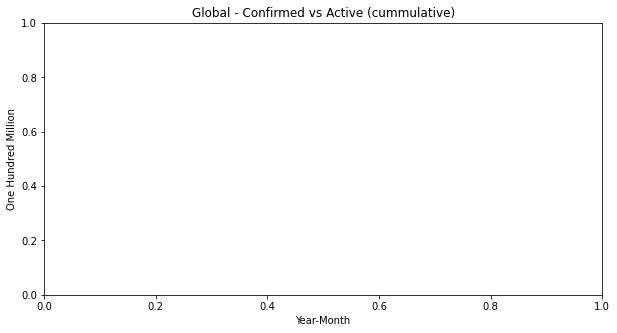

In [28]:
plt.figure(figsize=(10,5))
# y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
# x_axis = confirmed_19_df_by_date_active.index.tolist()
# plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Confirmed vs Active (cummulative)")
plt.plot(confirmed_19_df_by_date_active)
plt.legend(["Confirmed", "Active"], loc = "lower right")
plt.show()

In [ ]:
plt.savefig("global_confirmed_and_active_cummulative.png")

In [ ]:
plt.figure(figsize=(10,5))
y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
x_axis = confirmed_19_df_by_date_active.index.tolist()
plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Confirmed (cummulative)")
# plt.plot(confirmed_19_df_by_date_active)
plt.legend(["Confirmed"], loc = "lower right")
plt.show()

In [ ]:
plt.savefig("global_confirmed_cummulative.png")

In [ ]:
plt.figure(figsize=(10,5))
# y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
y_axis2 = confirmed_19_df_by_date_active["Active"].tolist()
x_axis = confirmed_19_df_by_date_active.index.tolist()
plt.plot(x_axis, y_axis2)
plt.xlabel("Year-Month")
plt.ylabel("Tens of Millions")
plt.title("Global - Active (cummulative)")
# plt.plot(confirmed_19_df_by_date_active)
plt.legend(["Active"], loc = "lower right")
plt.show()

In [ ]:
plt.savefig("global_active_cummulative.png")

In [ ]:
confirmed_19_df_by_date_conf_death_recov = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_conf_death_recov = confirmed_19_df_by_date_conf_death_recov.drop(["Active", "Confirmed", "Deaths", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_conf_death_recov

In [ ]:
plt.figure(figsize=(10,5))
# y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
# x_axis = confirmed_19_df_by_date_active.index.tolist()
# plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("Tens of Millions")
plt.title("Global - Recovered (cummulative)")
plt.plot(confirmed_19_df_by_date_conf_death_recov)
plt.legend(["Recovered"], loc = "lower right")
plt.show()

In [ ]:
plt.savefig("global_recovered_cummulative.png")

In [ ]:
confirmed_19_df_by_date_conf_death_death = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_conf_death_death = confirmed_19_df_by_date_conf_death_death.drop(["Active", "Recovered", "Confirmed", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_conf_death_death

In [ ]:
plt.figure(figsize=(10,5))
# y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
# x_axis = confirmed_19_df_by_date_active.index.tolist()
# plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("Millions")
plt.title("Global - Deaths (cummulative)")
plt.plot(confirmed_19_df_by_date_conf_death_death)
plt.legend(["Deaths"], loc = "lower right")
plt.show()

In [ ]:
plt.savefig("global_deaths_cummulative.png")

Note: Effective 12/14/2020, the US discontinued reporting the number of recoveries on a daily bases.  This represents a 6.3M adjustment to cummulative recoveries. The US has continued to report "zero" recoveries since this date. 

In [ ]:
confirmed_19_df_by_date_conf_death_recov
confirmed_19_df_by_date_conf_death_recov['2020-12-13':'2020-12-15']

See below - effective 12/14/2020, the US discontinued reporting the number of recoveries on a daily bases. 

In [ ]:
df = confirmed_19_df.groupby("Country/Region").get_group("US")
df1 = df.loc[(df["Date"] == "2020-12-13") | (df["Date"] == "2020-12-14") | (df["Date"] == "2020-12-15")]
df1

In [ ]:
df_china = confirmed_19_df.groupby("Country/Region").get_group("China")
df_china = df_china.drop(["Country/Region", "Active", "Recovered", "Deaths", "New cases", "New deaths", "New recovered"], axis=1)
df_china

In [ ]:
df_china['Date'] = pd.to_datetime(df_china['Date'])
df_chinav2 = df_china.groupby("Date").sum()

In [ ]:
df_chinav2

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel("Year-Month")
plt.ylabel("Number of Confirmed Cases")
plt.title("China Confirmed Cases (cummulative)")
plt.plot(df_chinav2)
plt.legend(["China"], loc = "lower right")
plt.show()

In [ ]:
plt.savefig("china_confirmed_cummulative.png")